# Problem Statement

When the company receives a loan application, the company has to make a decision for loan approval based on the applicant’s profile. Two types of risks are associated with the bank’s decision:

- If the applicant is likely to repay the loan, then not approving the loan results in a loss of business to the company

- If the applicant is not likely to repay the loan, i.e. he/she is likely to default, then approving the loan may lead to a financial loss for the company

The data provided contains the information about past loan applicants and whether they ‘defaulted’ or not. The aim is to identify patterns which indicate if a person is likely to default, which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc.

Use EDA to understand how consumer attributes and loan attributes influence the tendency of default.

# Data Understanding

In this section, we will try to get an initial understanding of the data provided.

In [54]:
#Load the necessary Libraries
import pandas as pd
import numpy as np
import warnings

In [55]:
# Set required options 
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 200)

In [60]:
# Load the loan data from CSV
loan_data = pd.read_csv('loan.csv')
loan_data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.0,NaN,10,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [62]:
# Load Data Dictionary
loan_data_dictionary = pd.read_excel('Data_Dictionary.xlsx')
loan_data_dictionary

,LoanStatNew,Description
0,acc_now_delinq,The number of accounts on which the borrower i...
1,acc_open_past_24mths,Number of trades opened in past 24 months.
2,addr_state,The state provided by the borrower in the loan...
3,all_util,Balance to credit limit on all trades
4,annual_inc,The self-reported annual income provided by th...
5,annual_inc_joint,The combined self-reported annual income provi...
6,application_type,Indicates whether the loan is an individual ap...
7,avg_cur_bal,Average current balance of all accounts
8,bc_open_to_buy,Total open to buy on revolving bankcards.
9,bc_util,Ratio of total current balance to high credit/...


## Dataframe Summary

Check details of the dataframe like how many rows and how many columns are present.

In [63]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


As per above the dataframe have 39717 rows with 111 columns each.

In [64]:
loan_data.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,14035.000000,2786.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39661.0,0.0,39717.0,0.0,0.0,0.0,39717.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39661.0,39717.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39020.000000,39678.0,0.0,0.0,0.0,0.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,35.900962,69.698134,9.294408,0.055065,13382.528086,22.088828,51.227887,50.989768,12153.596544,11567.149118,9793.348813,2263.663172,1.363015,95.221624,12.406112,2678.826162,0.0,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.043260,0.0,NaN,NaN,NaN,NaN
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,22.020060,43.822529,4.400282,0.237200,15885.016641,11.401709,375.172839,373.824457,9042.040766,8942.672613,7065.522127,2608.111964,7.289979,688.744771,148.671593,4447.136012,0.0,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.204324,0.0,NaN,NaN,NaN,NaN
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,18.000000,22.000000,6.000000,0.000000,3703.000000,13.000000,0.000000,0.000000,5576.930000,5112.310000,4600.000000,662.180000,0.000000,0.000000,0.000000,218.680000,0.0,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

The summary metrics of all columns are shown above.

### Column Types

The type of each column in the original dataframe is shown below.

In [70]:
loan_data.dtypes

id                                  int64
member_id                           int64
loan_amnt                           int64
funded_amnt                         int64
funded_amnt_inv                   float64
term                               object
int_rate                           object
installment                       float64
grade                              object
sub_grade                          object
emp_title                          object
emp_length                         object
home_ownership                     object
annual_inc                        float64
verification_status                object
issue_d                            object
loan_status                        object
pymnt_plan                         object
url                                object
desc                               object
purpose                            object
title                              object
zip_code                           object
addr_state                        

## Check Null Value Counts

Analyse the null values in the dataframe

In [50]:
# Checking all the columns with null values
null_count = loan_data.isnull().sum()
null_count[null_count > 0].sort_values(ascending=False)

bc_open_to_buy                    39717
acc_open_past_24mths              39717
bc_util                           39717
mo_sin_old_il_acct                39717
mo_sin_old_rev_tl_op              39717
mo_sin_rcnt_rev_tl_op             39717
mo_sin_rcnt_tl                    39717
mort_acc                          39717
mths_since_recent_bc              39717
mths_since_recent_bc_dlq          39717
mths_since_recent_inq             39717
mths_since_recent_revol_delinq    39717
num_accts_ever_120_pd             39717
num_actv_bc_tl                    39717
num_actv_rev_tl                   39717
num_bc_sats                       39717
num_bc_tl                         39717
num_il_tl                         39717
num_op_rev_tl                     39717
num_rev_accts                     39717
num_rev_tl_bal_gt_0               39717
num_sats                          39717
num_tl_120dpd_2m                  39717
num_tl_30dpd                      39717
num_tl_90g_dpd_24m                39717


In [51]:
# CHecking if any amount related columns have null values. It is needed because thse columns will be used in decision taking
loan_data[['loan_amnt','funded_amnt','funded_amnt_inv','term','int_rate','installment']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   loan_amnt        39717 non-null  int64  
 1   funded_amnt      39717 non-null  int64  
 2   funded_amnt_inv  39717 non-null  float64
 3   term             39717 non-null  object 
 4   int_rate         39717 non-null  object 
 5   installment      39717 non-null  float64
dtypes: float64(2), int64(2), object(2)
memory usage: 1.8+ MB


In [5]:
loan.shape

(39717, 111)

### Checking columns having more than 60% values null

In [6]:

missing_values = round((loan.isnull().sum()/len(loan.id))*100, 2)
#Columns where all the values are missing/NaN. Need to check if this has any importance
#missing_values = missing_values[(missing_values==100)]
#missing_values = missing_values[(missing_values>0) & (missing_values<100)]
missing_values.sort_values(ascending=False)

missing_values_60_percent = missing_values[missing_values>60]
missing_values_60_percent

mths_since_last_delinq             64.66
mths_since_last_record             92.99
next_pymnt_d                       97.13
mths_since_last_major_derog       100.00
annual_inc_joint                  100.00
dti_joint                         100.00
verification_status_joint         100.00
tot_coll_amt                      100.00
tot_cur_bal                       100.00
open_acc_6m                       100.00
open_il_6m                        100.00
open_il_12m                       100.00
open_il_24m                       100.00
mths_since_rcnt_il                100.00
total_bal_il                      100.00
il_util                           100.00
open_rv_12m                       100.00
open_rv_24m                       100.00
max_bal_bc                        100.00
all_util                          100.00
total_rev_hi_lim                  100.00
inq_fi                            100.00
total_cu_tl                       100.00
inq_last_12m                      100.00
acc_open_past_24

In [7]:
# CHecking if any row is empty
loan2.isnull().all(axis=1).sum()

NameError: name 'loan2' is not defined

# 2. Data Cleaning and Manipulation

In [ ]:
# We see several values where more than 60% values are missing. Lets keep a threshold for 60% missing values
# and remove all the columns where more than 60% values are missing
loan = loan.drop(missing_values_60_percent.index, axis=1)
loan.shape

In [ ]:
# Analyse missing values again after removing the threshold columns
missing_values = round((loan.isnull().sum()/len(loan.id))*100, 2)
missing_values = pd.DataFrame(missing_values[missing_values>0], columns=["missing_value_percentage"])
missing_values.sort_values(by=["missing_value_percentage"], ascending=False)

In [ ]:
# Also, desc column has no role on decision so lets remove that as well.
# Reason behind the removal: 1. 33% columns have no desc, also after going through some of the desc values it seems it just 
#a basic summary and borrower added date that can be find from other columns as well eg. purpose
loan = loan.drop('desc', axis=1)
loan.shape

### Filtering the columns which have same values for all the rows/records. Dropping the columns

In [ ]:
# Check for same values
loan.nunique().sort_values(ascending=True)

In [ ]:
# Columns having only single values
columns_with_single_value = ['tax_liens', 'delinq_amnt', 'chargeoff_within_12_mths', 'acc_now_delinq', 'application_type', 
                             'policy_code', 'collections_12_mths_ex_med', 'initial_list_status', 'pymnt_plan' ]
loan[columns_with_single_value]
# Meaning of the values and decide if the columns can be removed
#tax_liens : a legal claim against the assets of a person or business who fails to pay taxes owed. 
            #here all the values are 0 or NaN, so no role in the model. Needs to be removed
# delinq_amnt: Since the is no any past due amount for any account id, so we can remove this column
#chargeoff_within_12_mths : cahrge off means, a lender or creditor has written the account off as a loss, 
                           #and the account is closed to future charges. There is no any, so we can remove the column
#acc_now_delinq : It means the account on which the lender is delinquent. Since no any, sow e can remove column
#application_type : Here all the application_type is INDIVIDUAL only so we can remove it from model making.
#policy_code : Here each row is for publicly available policy_code, so we can remove it from model making.
#collections_12_mths_ex_med : No of collection in last 12 months including medical collection are either 0 or NaN, we can remove this column
#initial_list_status : The initial loan status can be W: Whole loan, F: Fractional Purchage. Here every valiue is f. We can remove column
#pymnt_plan : It indicates if a payment plan has been put in place for the loan. here every value is n i.e No

# Summary: If needed We can take the common value for each records, application_type= INDIVIDUAL, initial_list_status= f, pymnt_plan=n if needed further

In [ ]:
# Remove above columns
loan = loan.drop(columns_with_single_value, axis=1)
loan.shape

### Correcting the data by ommiting unnecessary prefixes and suffixes


In [ ]:
loan.dtypes

In [ ]:
loan['int_rate'] = loan['int_rate'].apply(lambda x: x[:-1])
loan['term'] = loan['term'].apply(lambda x: x[:-7])
loan[['int_rate','term']].head()

In [ ]:
# emp_length is for the duration a lender is employed. It can play a good role in deciding the loan approve/rejection
len(loan['emp_length'][loan['emp_length'].isnull()]) # 1075

# FIll with zero if there is any NaN value
loan['emp_length'].fillna('0',inplace=True)
len(loan['emp_length'][loan['emp_length'].isnull()])   # Now 0
# Remove all the extra valueas like years, < , > or + signs and keep only numeric value
loan['emp_length'] = loan['emp_length'].str.extract('(\d+)')
loan['emp_length']

In [ ]:
loan.dtypes

In [ ]:
#Changing Data types for term, int_rate and emp_length to float
loan['term'] = loan['term'].astype('float64')
loan['int_rate'] = loan['int_rate'].astype('float64')
loan['emp_length'] = loan['emp_length'].astype('float64')
loan.dtypes

### Date columns cleaning and adding derived columns related to date


In [ ]:
loan[['issue_d', 'earliest_cr_line', 'last_pymnt_d', 'last_credit_pull_d']]

In [ ]:
loan['issue_d'] = loan['issue_d'].apply(pd.to_datetime, format='%b-%y')
loan['earliest_cr_line'] = loan['earliest_cr_line'].apply(pd.to_datetime, format='%b-%y')
loan['last_pymnt_d'] = loan['last_pymnt_d'].apply(pd.to_datetime, format='%b-%y')
loan['last_credit_pull_d'] = loan['last_credit_pull_d'].apply(pd.to_datetime, format='%b-%y')
loan[['issue_d', 'earliest_cr_line', 'last_pymnt_d', 'last_credit_pull_d']].dtypes

In [ ]:
# Derived columns for dates
loan['issue_year']=loan['issue_d'].dt.year
loan['issue_month']=loan['issue_d'].dt.month
loan

# 3. Data analysis

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [32]:
# Utility functions

# IQR
def drop_outliers(dataframe, column):
    perc75 = dataframe[column].quantile(0.75)
    perc25 = dataframe[column].quantile(0.25)
    iqr = perc75-perc25
    lower_bound = perc25 - iqr * 1.5
    upper_bound = perc75 + iqr * 1.5
    current_rows = len(dataframe)
    dataframe = dataframe[(dataframe[column] >= lower_bound) & (dataframe[column] <= upper_bound)]
    print('Dropped %s rows' % (current_rows - len(dataframe)))
    return dataframe    
    

<Axes: >

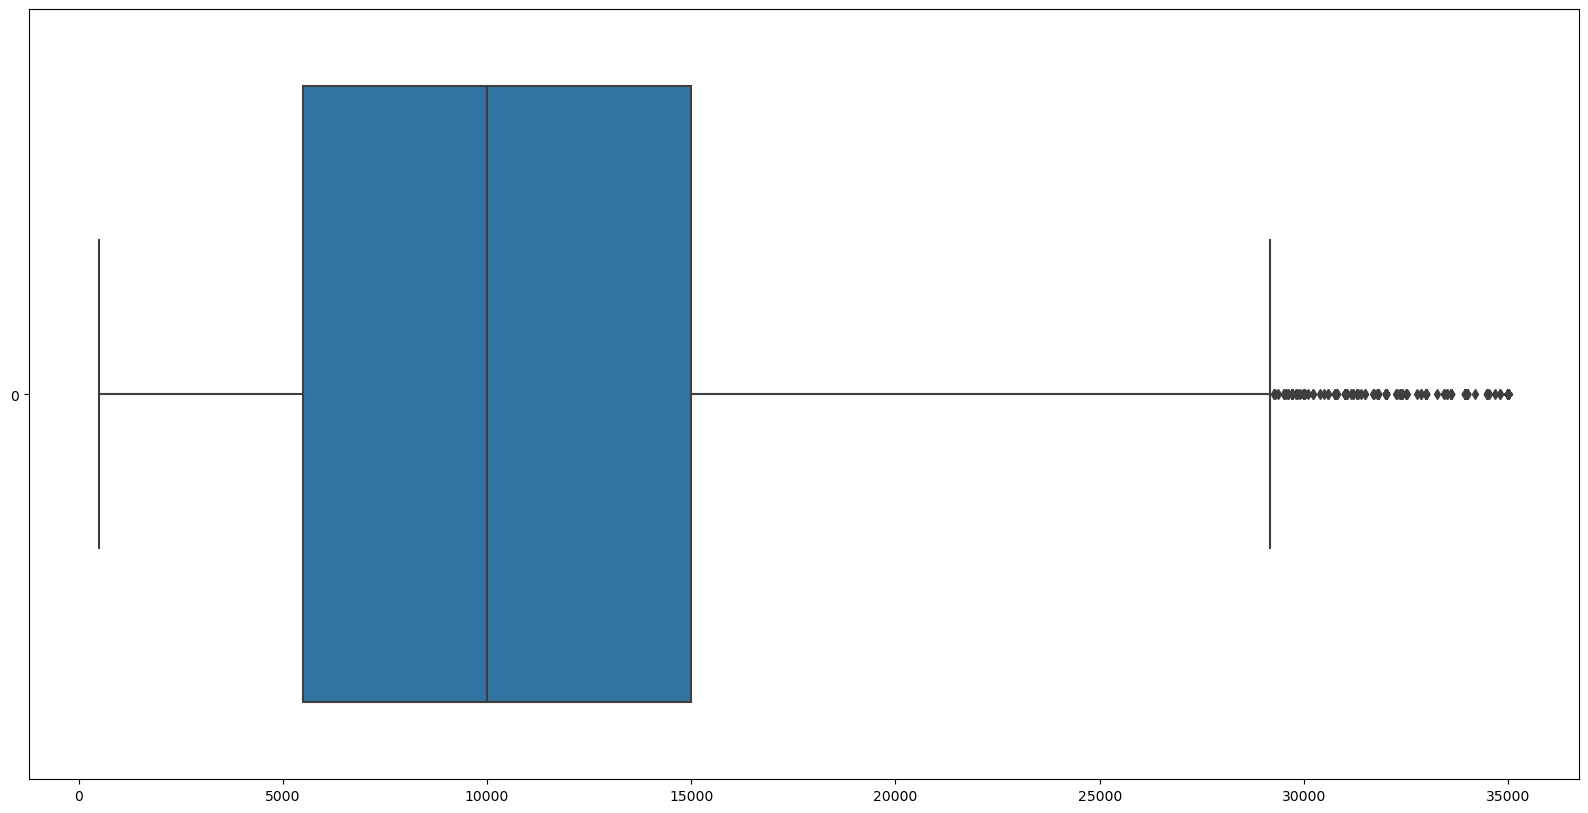

In [21]:
## Remove Outliers
plt.figure(figsize=(20,10))
sns.boxplot(loan['loan_amnt'], orient='h')
drop_outliers()

Dropped 1230 rows


<Axes: >

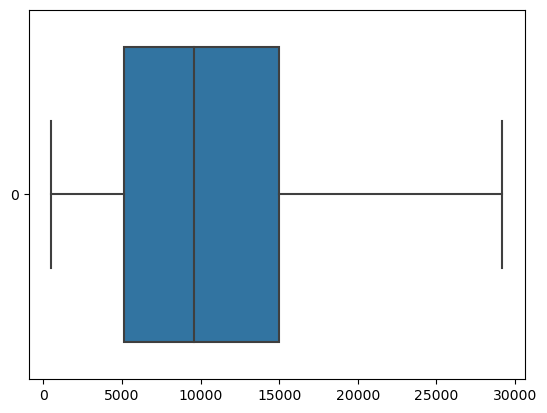

In [31]:
sns.boxplot(drop_outliers(loan, 'loan_amnt')['loan_amnt'], orient='h')